### mRNA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
clin_file = 'clinical_final_extra.csv'
clin_data = pd.read_csv(clin_file)
clin_data.set_index('bcr_patient_barcode',inplace=True)
clin_data.sort_values(by=["bcr_patient_barcode"]);
# X = X.transpose()

In [4]:
mrna_file = 'mrna_final.xlsx'
mrna_data = pd.read_excel(mrna_file, sheet_name='Sheet2')
mrna_data.set_index('gene',inplace=True)
mrna_data = mrna_data.transpose()

In [5]:
#remove NAs
row1 = list(mrna_data.iloc[1,:])

In [6]:
l_col=[]
for i in range(0,len(row1)):
    if pd.isnull(row1[i])==True:
        l_col.append(mrna_data.columns[i])     
len(l_col)

305

In [7]:
mrna_data=mrna_data.drop(columns=l_col)
mrna_data.shape

(530, 20226)

In [8]:
ll = list(mrna_data.index)
for item in ll:
    tc = item[-3:]
    if tc=="-02":
        mrna_data = mrna_data.drop(str(item))

In [9]:
mrna_data.shape

(516, 20226)

In [10]:
lll = list(mrna_data.index)
ll_new = []
for item in lll:
    item = item[0:12]
    ll_new.append(item)
mrna_data.index = ll_new

In [11]:
rem_row = list(set(mrna_data.index)^set(clin_data.index))
len(rem_row)

2

In [12]:
rem_row

['TCGA-CS-5390', 'TCGA-R8-A6YH']

In [13]:
for x in rem_row:
    if (x in clin_data.index):
        clin_data = clin_data.drop(x)
    if (x in mrna_data.index):
        mrna_data = mrna_data.drop(x)

print(clin_data.shape)
print(mrna_data.shape)

(514, 32)
(514, 20226)


In [14]:
X = mrna_data.loc[:,["ALG6_29929","C10orf120_399814","C17orf77_146723","C21orf94_246705","CALCA_796","EXT2_2132","FRG2B_441581","FRG2C_100288801","HIST1H1T_3010","HOXC4_3221","HSP90B3P_343477","IQGAP2_10788","LACRT_90070","LCE2C_353140","LILRA3_11026","LYZL1_84569","MYBPC2_4606","NFATC4_4776","NKX2_6_137814","OPN1SW_611","OR10A4_283297","OR1L4_254973","OR2A14_135941","OR2D2_120776","OR2M2_391194","OR5T3_390154","PABPC3_5042","PDHA2_5161","PLGLA_285189","RBMY1F_159163","RIPK4_54101","SMC4_10051","SPINK5_11005","TNFRSF11B_4982","TNFSF14_8740","WEE1_7465"]]

KeyError: "None of [Index(['ALG6_29929', 'C10orf120_399814', 'C17orf77_146723', 'C21orf94_246705',\n       'CALCA_796', 'EXT2_2132', 'FRG2B_441581', 'FRG2C_100288801',\n       'HIST1H1T_3010', 'HOXC4_3221', 'HSP90B3P_343477', 'IQGAP2_10788',\n       'LACRT_90070', 'LCE2C_353140', 'LILRA3_11026', 'LYZL1_84569',\n       'MYBPC2_4606', 'NFATC4_4776', 'NKX2_6_137814', 'OPN1SW_611',\n       'OR10A4_283297', 'OR1L4_254973', 'OR2A14_135941', 'OR2D2_120776',\n       'OR2M2_391194', 'OR5T3_390154', 'PABPC3_5042', 'PDHA2_5161',\n       'PLGLA_285189', 'RBMY1F_159163', 'RIPK4_54101', 'SMC4_10051',\n       'SPINK5_11005', 'TNFRSF11B_4982', 'TNFSF14_8740', 'WEE1_7465'],\n      dtype='object', name='gene')] are in the [columns]"

In [67]:
y = clin_data["OS"]
y_new = []
for item in y:
    y_new.append(item)

In [68]:
random_state=0
X_train, X_test, y_train, y_test = train_test_split(mrna_data, y_new, test_size=0.4, stratify=y_new, random_state=random_state)

In [71]:
accuracies_test_list = []
accuracies_train_list = []
for i in range(2,10):
    n_neighbors = i
    random_state = 0
    nca = make_pipeline(StandardScaler(),NeighborhoodComponentsAnalysis(n_components=32,random_state=random_state))
    # Fit the model
    nca.fit(X_train, y_train)
    # Fit a nearest neighbor classifier on the embedded training set
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(nca.transform(X_train), y_train)
    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn_test = knn.score(nca.transform(X_test), y_test)
    acc_knn_train = knn.score(nca.transform(X_train), y_train)
    accuracies_test_list.append(acc_knn_test)
    accuracies_train_list.append(acc_knn_train)

0.7961165048543689
0.7824675324675324


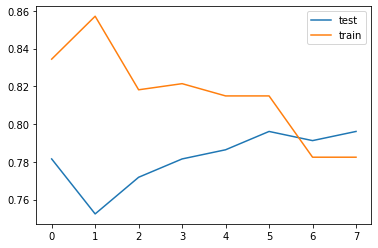

In [72]:
print(accuracies_test_list[np.argmax(accuracies_test_list)])
print(accuracies_train_list[np.argmin(accuracies_train_list)])
plt.plot(accuracies_test_list, label="test")
plt.plot(accuracies_train_list, label="train")
plt.legend()
plt.show()

In [ ]:
# Embed the data set in 2 dimensions using the fitted model
X_embedded = nca.transform(X)

In [73]:
clin_data.to_csv("processed_clinical_mrna.csv")
mrna_data.to_csv("processed_mrna.csv")